In [106]:
import glob
import json
import os
import sys
from pathlib import Path

import matplotlib.pyplot as plt

%matplotlib inline

# Add src/ path to get other scripts
cwd = Path(os.path.abspath(os.getcwd()))
sys.path.append(os.path.join(cwd.parent.absolute()))

import helpers.utilities as utils

logger = utils.create_logger()

In [56]:
def print_as_json(dictionary):
    print(json.dumps(dictionary, indent=4, ensure_ascii=False))

Load all PB files from `/src/analytics/pb_files directory`

In [19]:
path_to_pb_files = os.path.join(cwd, "pb_files", "*.pb")
files = glob.glob(path_to_pb_files)

counter = 0

all_files = []

for pb_file in files:
    filename = os.path.basename(pb_file)
    # logger.info(f"Loading file: `{filename}`...")
    counter +=1 
    if counter % 100 == 0:
        logger.info(f"Loaded {counter} files...")
    meta, projects, votes, _, _ = utils.load_pb_file(pb_file)
    all_files.append([meta, projects, votes])

logger.info(f"Finished. Loaded {counter} .pb files.")

12:08:54 | Pabulib | INFO     | __main__:<module>:10 - Loaded 100 files...
12:08:55 | Pabulib | INFO     | __main__:<module>:10 - Loaded 200 files...
12:08:56 | Pabulib | INFO     | __main__:<module>:10 - Loaded 300 files...
12:08:58 | Pabulib | INFO     | __main__:<module>:10 - Loaded 400 files...
12:08:59 | Pabulib | INFO     | __main__:<module>:10 - Loaded 500 files...
12:09:00 | Pabulib | INFO     | __main__:<module>:10 - Loaded 600 files...
12:09:02 | Pabulib | INFO     | __main__:<module>:10 - Loaded 700 files...
12:09:06 | Pabulib | INFO     | __main__:<module>:10 - Loaded 800 files...
12:09:10 | Pabulib | INFO     | __main__:<module>:14 - Finished. Loaded `877` .pb files.


In [57]:
cities = {}
projects_total, votes_total = 0, 0


for data in all_files:
    meta, projects, votes = data
    city = meta["unit"]
    
    cities[city] = cities.setdefault(city, 0) + 1
    projects_total += int(meta["num_projects"])
    votes_total += int(meta["num_votes"])

cities = {k: v for k, v in sorted(cities.items(), key=lambda item: item[1], reverse=True)}
print_as_json(cities)
print(f'Sum of all projects: {projects_total:,}')
print(f'Sum of all votes: {votes_total:,}')

{
    "Warszawa": 344,
    "Wrocław": 99,
    "Kraków": 95,
    "Łódź": 74,
    "Katowice": 46,
    "Gdynia": 43,
    "Amsterdam": 40,
    "Zabrze": 38,
    "Gdańsk": 36,
    "Mechanical Turk": 24,
    "Czestochowa": 21,
    "Poznań": 15,
    "Toulouse": 1,
    "Wieliczka": 1
}
Sum of all projects: 20,973
Sum of all votes: 4,424,253


In [63]:
meta, projects, votes = all_files[351]
print(meta['description'])
num_votes = meta["max_length"]
print(num_votes)
# print(votes)
print([len(vote['vote'].split(',')) for vote in votes.values()][:10])


Local PB in Łódź, Górna | Górniak
5
[3, 1, 3, 3, 2, 3, 1, 1, 2, 1]


In [104]:
counter = 0
max_10_projects, max_10_projects_desc = [], []
for data in all_files:
    meta, projects, votes = data
    max_length = meta.get("max_length")
    if meta["country"] == "Artificial":
        continue
    if max_length and int(max_length) > 1 and (max_length != meta.get("min_length")):
        # print(meta["description"])
        counter += 1

    if max_length and int(max_length) == 10:
        max_10_projects.append([len(vote['vote'].split(',')) for vote in votes.values()])
        max_10_projects_desc.append(meta["instance"])

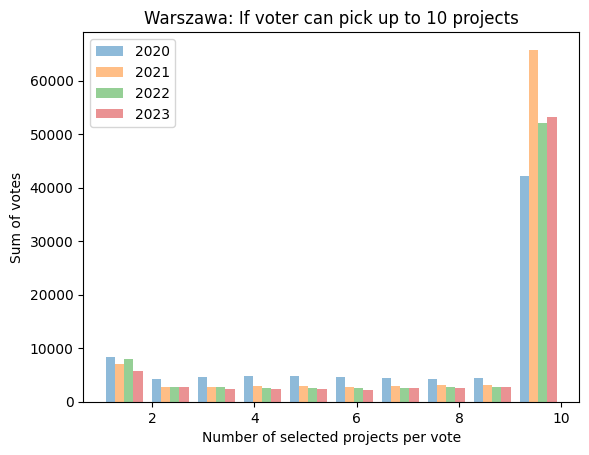

In [105]:
plt.hist(max_10_projects, alpha=0.5, label=max_10_projects_desc)
plt.title('Warszawa: If voter can pick up to 10 projects')
plt.ylabel('Sum of votes')
plt.xlabel('Number of selected projects per vote')
plt.legend(loc='upper left')
plt.show()

In [69]:

import math
import abc

print("Hello")
